---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [2]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [56]:
def answer_one(): 
    # Your code here
    df = pd.read_csv('fraud_data.csv')
    perc = df['Class'].value_counts().iloc[1]/(df['Class'].value_counts().sum())
    return perc # Return your answer

0.016410823768035772

In [4]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
y_test

16629    0
19225    0
8754     0
1524     0
4330     0
18149    0
18626    0
2743     0
12408    0
14296    0
8811     0
9619     0
13087    0
1341     0
12738    0
17658    0
15277    0
15703    0
5559     0
6577     0
3161     0
3148     0
6377     0
16599    0
1751     0
11371    0
8949     0
9383     0
6330     0
14034    0
        ..
18481    0
4346     0
19312    0
1        0
8040     0
16546    0
6619     0
14051    0
18028    1
280      0
13118    0
17435    0
10664    0
15247    0
19751    0
9254     0
15838    0
11129    0
20356    0
12345    0
15308    0
8156     0
17794    0
16238    0
14434    0
15721    0
13061    0
13082    0
10933    0
124      0
Name: Class, dtype: int64

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [13]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    # Your code here
    # Negative class (0) is most frequent
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    # Therefore the dummy 'most_frequent' classifier always predicts class 0
    y_dummy_predictions = dummy_majority.predict(X_test)
    accuracy = dummy_majority.score(X_test, y_test)
    recall = recall_score(y_test, y_dummy_predictions)
    return (accuracy, recall) # Return your answer


(0.98525073746312686, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [15]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    # Your code here
    svc = SVC().fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    recall = recall_score(y_test, svc.predict(X_test))
    precision = precision_score(y_test, svc.predict(X_test))
    return (accuracy, recall, precision) # Return your answer


(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [58]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    svc = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
    svc_pred = svc.decision_function(X_test) > -220
    confusion = confusion_matrix(y_test, svc_pred)
    return confusion # Return your answer

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

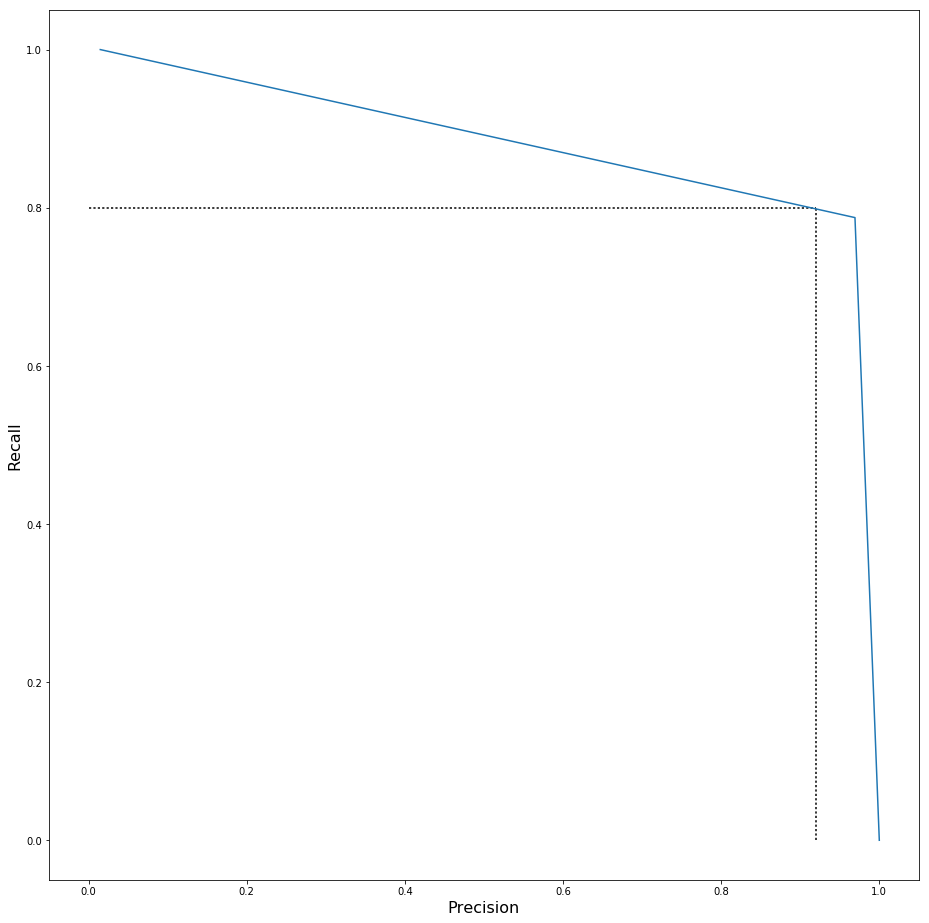

[[  9.98749097e-01   1.25090280e-03]
 [  9.98542155e-01   1.45784455e-03]
 [  9.97504691e-01   2.49530907e-03]
 ..., 
 [  9.97862537e-01   2.13746337e-03]
 [  9.99587072e-01   4.12928407e-04]
 [  9.98022349e-01   1.97765092e-03]]


"\nfrom sklearn.metrics import roc_curve, auc\nfpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test))\nroc_auc = auc(fpr, tpr)\n\nplt.figure(figsize=(16,16))\nplt.xlim([-0.01, 1.00])\nplt.ylim([-0.01, 1.01])\nplt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc))\nplt.vlines(0.16, 0, 1, linestyle='dotted')\nplt.hlines(0.823, 0, 0.16, linestyle='dotted')\nplt.xlabel('False Positive Rate', fontsize=16)\nplt.ylabel('True Positive Rate', fontsize=16)\nplt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)\nplt.legend(loc='lower right', fontsize=13)\nplt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')\nplt.axes().set_aspect('equal')\nplt.show()\n"

In [17]:
def answer_five():        
    # Your code here  

    return (0.8, 0.92) # Return your answer

'''
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
   
logit = LogisticRegression().fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, logit.predict(X_test))
    
#%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.vlines(0.92, 0, 0.8, linestyle='dotted')
plt.hlines(0.8, 0, 0.92, linestyle='dotted')
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print(logit.predict_proba(X_test))
'''

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [49]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    Logit = LogisticRegression()
    grid_val = {'penalty': ['l1', 'l2'],'C':[0.01, 0.1, 1, 10, 100]}
    grid = GridSearchCV(Logit, param_grid = grid_val, scoring = 'recall')
    grid.fit(X_train, y_train)
    df = pd.DataFrame(grid.cv_results_)[['param_penalty','param_C','mean_test_score']].set_index(['param_C','param_penalty'])
    df = df.unstack()
    arr = np.array(df)
    return arr # Return your answer

array([[ 0.66666667,  0.76086957],
       [ 0.80072464,  0.80434783],
       [ 0.8115942 ,  0.8115942 ],
       [ 0.80797101,  0.8115942 ],
       [ 0.80797101,  0.80797101]])

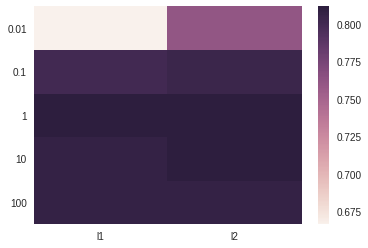

In [51]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())